In [15]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [16]:
x = np.array([i*np.pi/180 for i in range(0, 360, 6)])
y = 2*np.sin(x) + np.random.normal(0, 0.3, len(x))

In [34]:
data = pd.DataFrame(np.column_stack([x,y]), columns=['x', 'y'])

In [35]:
data.head()

,x,y
0,0.000000,0.074444
1,0.104720,0.449441
2,0.209440,0.286061
3,0.314159,0.885536
4,0.418879,1.116170


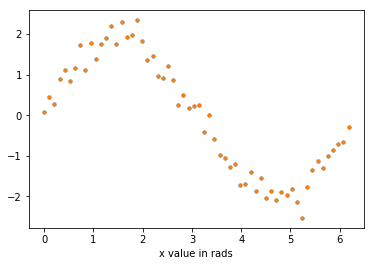

In [36]:
plt.plot(data['x'], data['y'], '.')

plt.plot(x, y, '.')

plt.xlabel("x value in rads")
plt.show()

In [40]:
def linear_regression(data, power):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
        for i in range(2,power+1):  #power of 1 is already there
            colname = 'x_%d'%i      #new var will be x_power
            data[colname] = data['x']**i
    
    if power==2:
        print data.head()

    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    return y_pred

In [41]:
linear_regression(data, 2)

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  0.000000  0.074444  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.104720  0.449441  0.010966  0.001148  0.000120  0.000013  0.000001   
2  0.209440  0.286061  0.043865  0.009187  0.001924  0.000403  0.000084   
3  0.314159  0.885536  0.098696  0.031006  0.009741  0.003060  0.000961   
4  0.418879  1.116170  0.175460  0.073496  0.030786  0.012896  0.005402   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  1.381021e-07  1.446202e-08  1.514459e-09  1.585938e-10  1.660790e-11   
2  1.767707e-05  3.702277e-06  7.754031e-07  1.624000e-07  3.401299e-08   
3  3.020293e-04  9.488531e-05  2.980910e-05  9.364805e-06  2.942040e-06   
4  2.262665e-03  9.477829e-04  3.970064e-04  1.662976e-04  6.965859e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+00  0.000000e+00  0.00000

array([ 1.79473841,  1.73936439,  1.68364331,  1.62757516,  1.57115996,
        1.51439769,  1.45728836,  1.39983197,  1.34202852,  1.283878  ,
        1.22538042,  1.16653579,  1.10734409,  1.04780532,  0.9879195 ,
        0.92768661,  0.86710666,  0.80617965,  0.74490558,  0.68328445,
        0.62131625,  0.55900099,  0.49633868,  0.43332929,  0.36997285,
        0.30626935,  0.24221878,  0.17782115,  0.11307646,  0.04798471,
       -0.01745411, -0.08323999, -0.14937292, -0.21585292, -0.28267999,
       -0.34985411, -0.4173753 , -0.48524354, -0.55345885, -0.62202123,
       -0.69093066, -0.76018715, -0.82979071, -0.89974133, -0.97003901,
       -1.04068375, -1.11167556, -1.18301443, -1.25470035, -1.32673334,
       -1.3991134 , -1.47184051, -1.54491469, -1.61833593, -1.69210423,
       -1.76621959, -1.84068201, -1.9154915 , -1.99064804, -2.06615165])

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  0.000000  0.074444  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.104720  0.449441  0.010966  0.001148  0.000120  0.000013  0.000001   
2  0.209440  0.286061  0.043865  0.009187  0.001924  0.000403  0.000084   
3  0.314159  0.885536  0.098696  0.031006  0.009741  0.003060  0.000961   
4  0.418879  1.116170  0.175460  0.073496  0.030786  0.012896  0.005402   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  1.381021e-07  1.446202e-08  1.514459e-09  1.585938e-10  1.660790e-11   
2  1.767707e-05  3.702277e-06  7.754031e-07  1.624000e-07  3.401299e-08   
3  3.020293e-04  9.488531e-05  2.980910e-05  9.364805e-06  2.942040e-06   
4  2.262665e-03  9.477829e-04  3.970064e-04  1.662976e-04  6.965859e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+00  0.000000e+00  0.00000

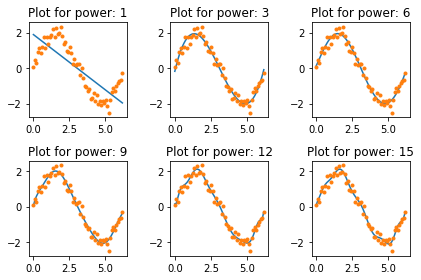

In [42]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
for power in range(1,16):
    y_pred = linear_regression(data, power=power)
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)